<img src="https://raw.githubusercontent.com/ml-unison/regresion-logistica/master/imagenes/ml-unison.png" width="250">

# Diferentes técnicas de aprendizaje máquina

**Julio Waissman Vianova**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use('ggplot')
%matplotlib inline


# Conjuntos de datos de prueba en sklearn que utlizaremos
#----------------------------------------------------------

# Los conjuntos artificiales típicos para probar datos
from sklearn.datasets import make_moons           # En forma de medialunas 
from sklearn.datasets import make_circles         # En forma de círculos
from sklearn.datasets import make_classification  # Como separación lineal


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Los métodos de aprendizaje a utilizar ya provenientes de sklearn
#------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.svm import SVC                             # SVM
from sklearn.tree import DecisionTreeClassifier         # Arbol decisión
from sklearn.ensemble import RandomForestClassifier     # Bósque aleatorios
from sklearn.ensemble import AdaBoostClassifier         # ADA Boost
from sklearn.naive_bayes import GaussianNB              # Naive bayes
from sklearn.linear_model import  LogisticRegression    # Logística con regularización
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   # Logística con polinomio de orden 2 


## 1. Comparasión de diferentes clasificadores

Muestra para 3 conjuntos de datos artificiales bidimensionales, la forma en que se realiza la clasificación con distintos métodos. Principalmente lo hacemos para poder sacar conclusiones sobre en que situaciones un método puede ser mejor que otros, y que está haciendo internamente.

Codigo obtenido de la documentación de scikit-learn, el cual se puede consultar [aquí](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

### 1.1. Generando 3 conjuntos de aprendizaje sintéticos
ara probar como funcionan los diferentes tipos de clasificadores, primero vamos a revisar cual es el tipo de partición del espacio que se espera con cada uno de ellos en 3 casos diferentes. Para los tres casos se va a generar 3 conjuntos de datos sintéticos es dos dimensiones (con el fin de graficar las diferencias).

Estos tres conjuntos son de la siguiente forma:

1. El primer conjunto tiene forma de media luna los datos de una clase respecto a la otra.

2. En el segundo conjunto de datos, los datos de las dos clases están en círculos concéntricos.

3. El tercer caso son datos linealmente separables con ruido.


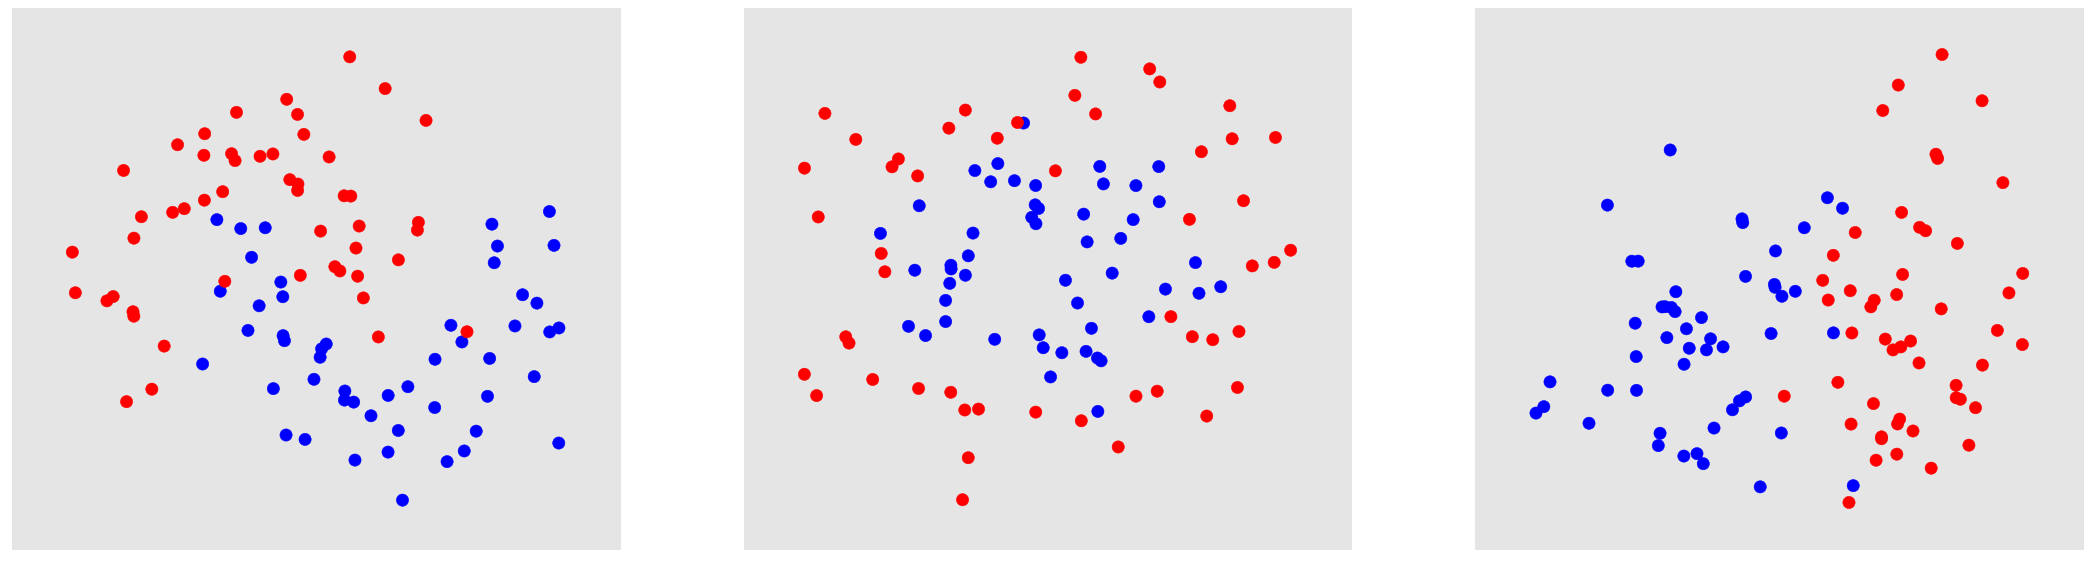

In [2]:
# Datos en forma de media luna
X1, y1 = make_moons(noise=0.3, random_state=0)

# Datos en forma de círculos
X2, y2 = make_circles(noise=0.2, factor=0.5, random_state=1)

# Datos en forma de regresion lineal
X3, y3 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             random_state=1, n_clusters_per_class=1)
# Le agregamos ruido para hacerlos interesantes
rng = np.random.RandomState(2)
X3 += 2 * rng.uniform(size=X3.shape)

# Los conjuntos de datos irdenados como una lista de pares ordenados
datasets = [(X1, y1), (X2, y2), (X3, y3)]

# Y los grafiacamos para verlos
figure = plt.figure(figsize=(30, 10))
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (i, ds) in enumerate(datasets):

    # Selecciona los valores del conjunto de datos y los escala
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Grafica
    ax = plt.subplot(1, 3, i+1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap=cm_escala)
    ax.set_xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    ax.set_ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
    ax.set_xticks(())
    ax.set_yticks(())
figure.subplots_adjust(left=.02, right=.98)    
plt.show()


### 1.2. Definiendo una la bateria de clasificadores diferentes

En esta sección se va a generar una batería de diferentes objetos clasificador, cada uno proveniente de una técnica diferente. Todos los vamos a guardar en una lista de objetos tipo clasificador de `sklearn`.

Una ventaja de `sklearn` es que todos los objetos clasificador se pueden ajustar sus parámetros en la inicialización, y todos (sean del tipo que sean) utilizan varios métodos, siempre de la misma manera, en particular: `clf.fit` para el aprendizaje y `cls.predict`para el reconocimiento.

In [3]:
clasificadores = [
    KNeighborsClassifier(3),                  # 3 vecinos próximos
    SVC(kernel="linear", C=0.025),            # SVC lineal con C = 0.025
    SVC(gamma=2, C=1),                        # SVC gaussiano con gamma = 2 y C = 1
    DecisionTreeClassifier(max_depth=5),      # Árbol de decisión con máxima profundidad de 5
    RandomForestClassifier(max_depth=5,       # Bósque aleatorios con 10 árboles 
                           n_estimators=10, 
                           max_features=1),
    AdaBoostClassifier(),                     # ADA Boost 
    GaussianNB(),                             # Naive bayes con distribución gaussiana
    LogisticRegression(solver='lbfgs'),       # Logística 
    QuadraticDiscriminantAnalysis()           # Logística con términos cuadráticos 
]

# Solo para fines de graficación
titulos = ["3 vecinos próximos", 
           "SVM lineal", 
           "SVM gaussiano", 
           "Árbol de desición",
           "Boseques aleatórios", 
           "AdaBoost", 
           "Naive Bayes", 
           "Logística",
           "Discriminante cuadrático"]


### 1.3. Generando la clasificación con cada método diferente

Por cada método establecido, y por cada conjunto de datos, vamos a realizar la clasificación con los datos de aprendizaje, y luego vamos a realizar la predicción con un monton de puntos del espacio (en forma de rejilla) con tal de poner de manifiesto cual es el tipo de partición que induce cada uno de los algoritmos propuestos.

Esto se realiza en forma genética, así que es exactamente igual para todos los mñetodos. Por esto se utilizan varios comandos provenientes de `matplotlib`para generar los datos para reconocer en forma de rejilla, y se realizan algunas operaciones no tan comunes para graficar, que se espera no haya problema en entenderlas, al ser solo un problema técnico.





******************************

Base de datos 1
******************************



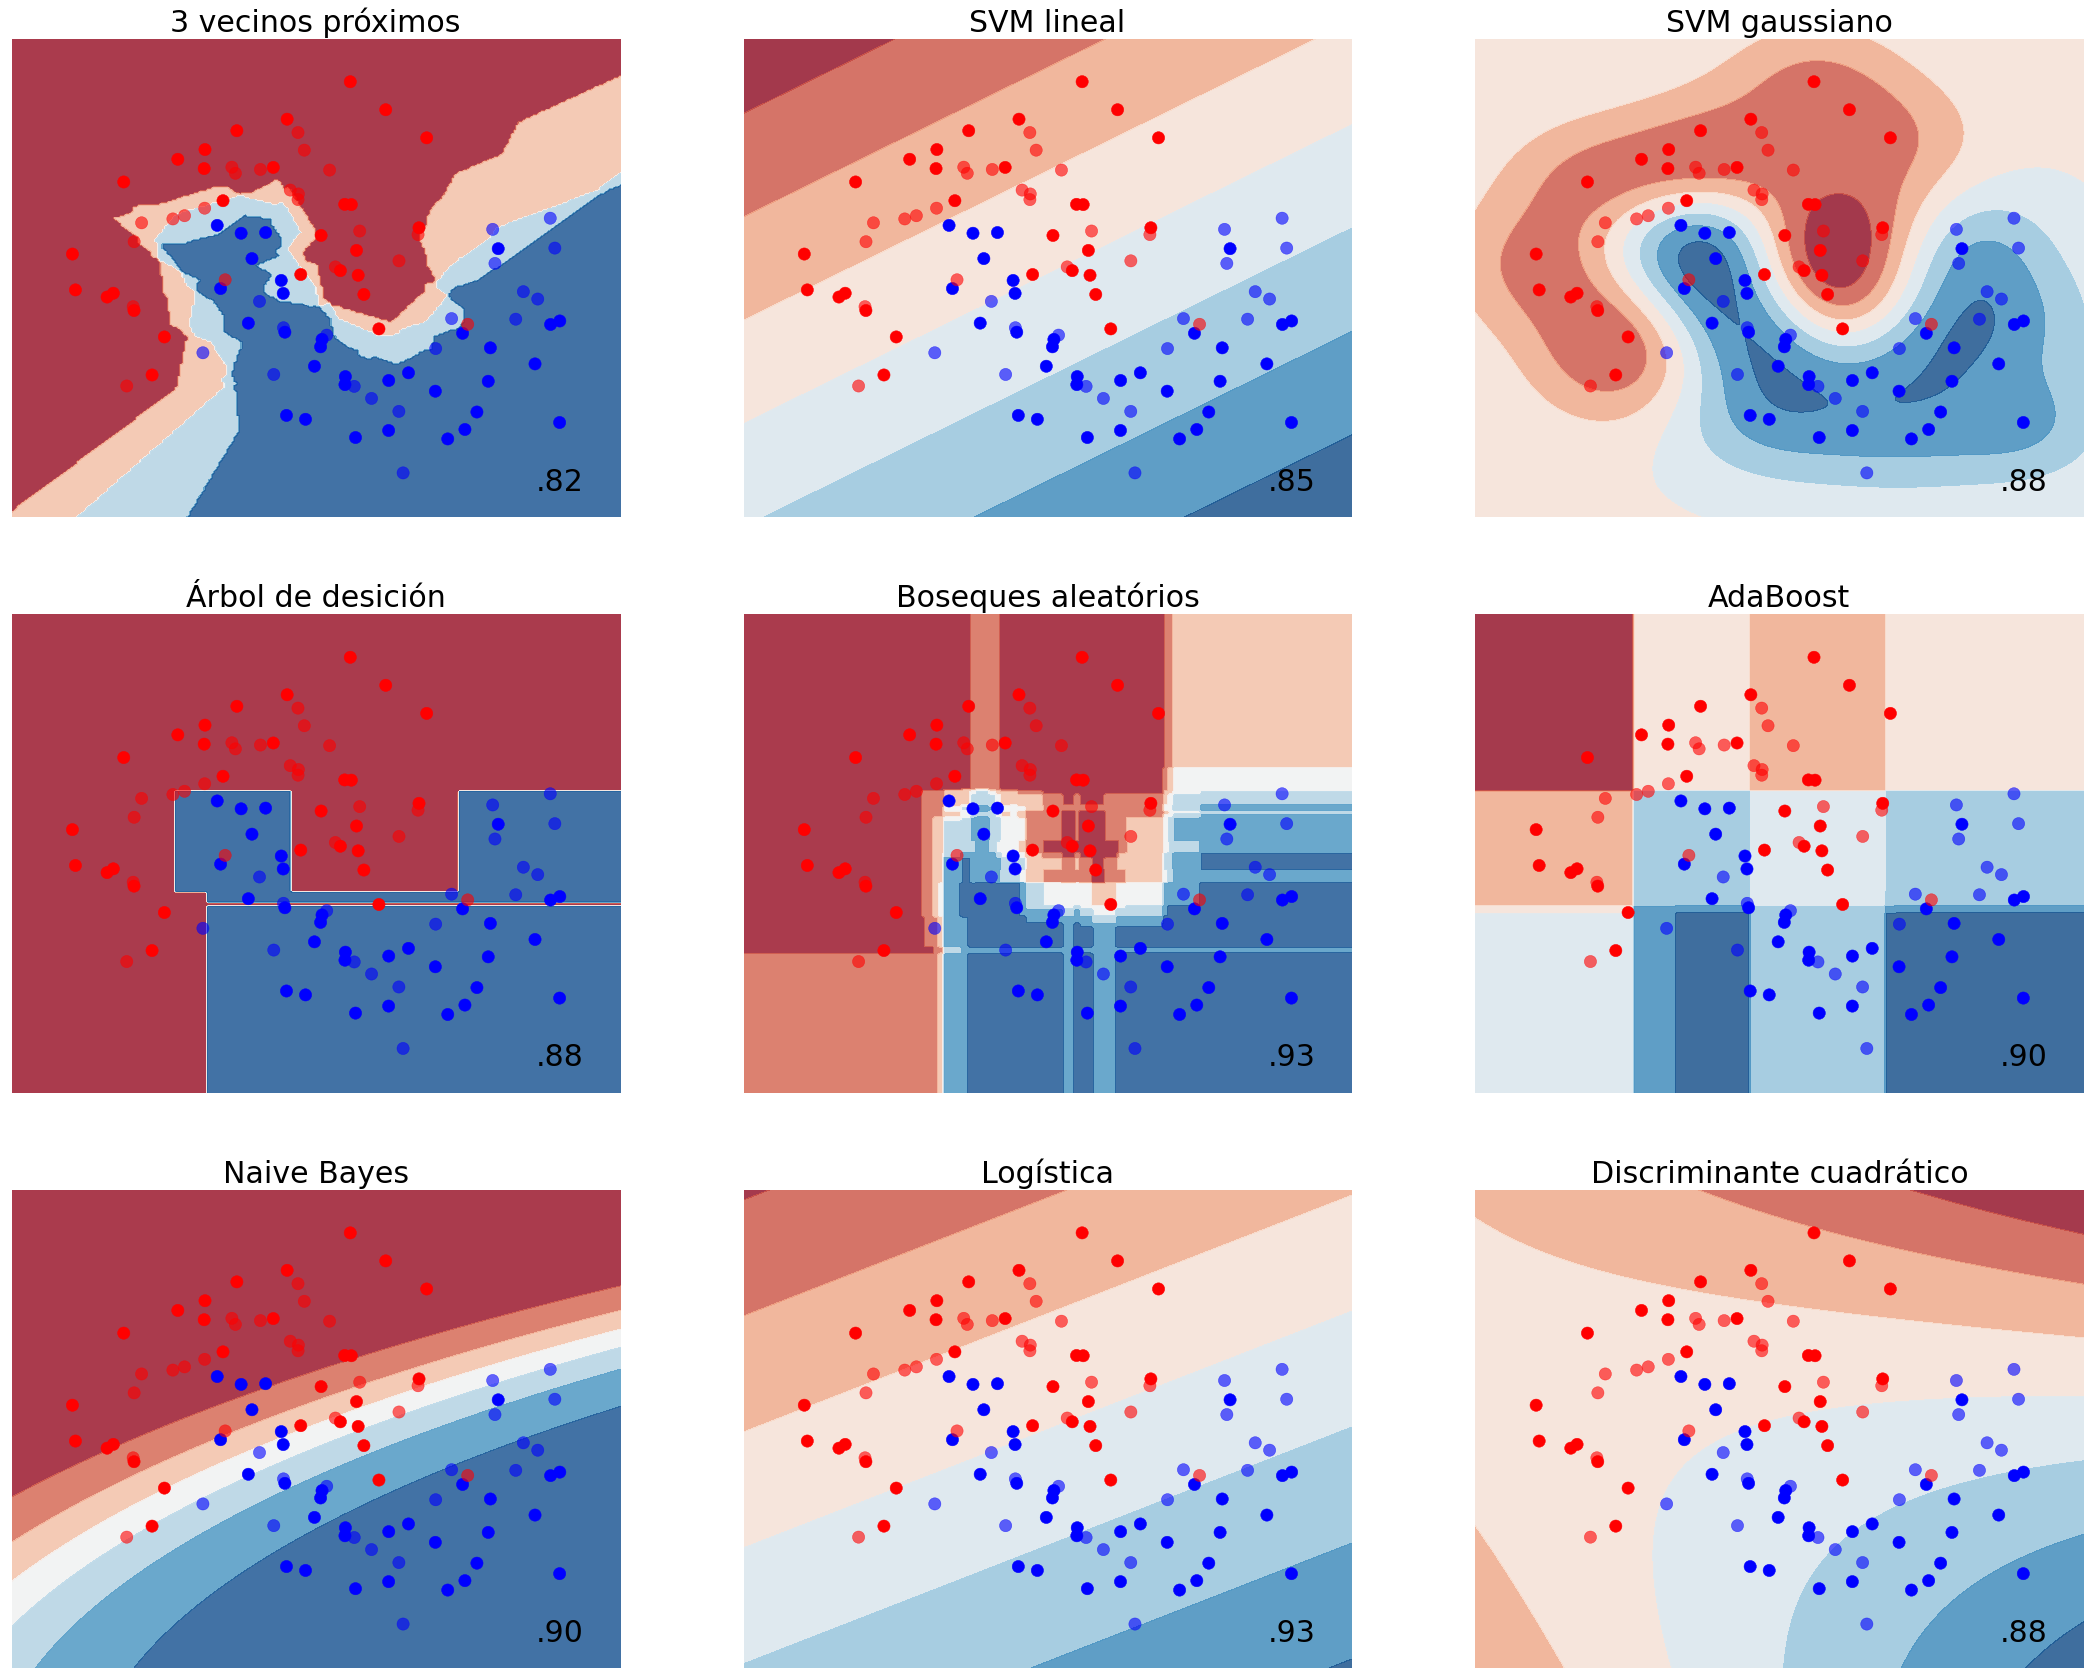





******************************

Base de datos 2
******************************



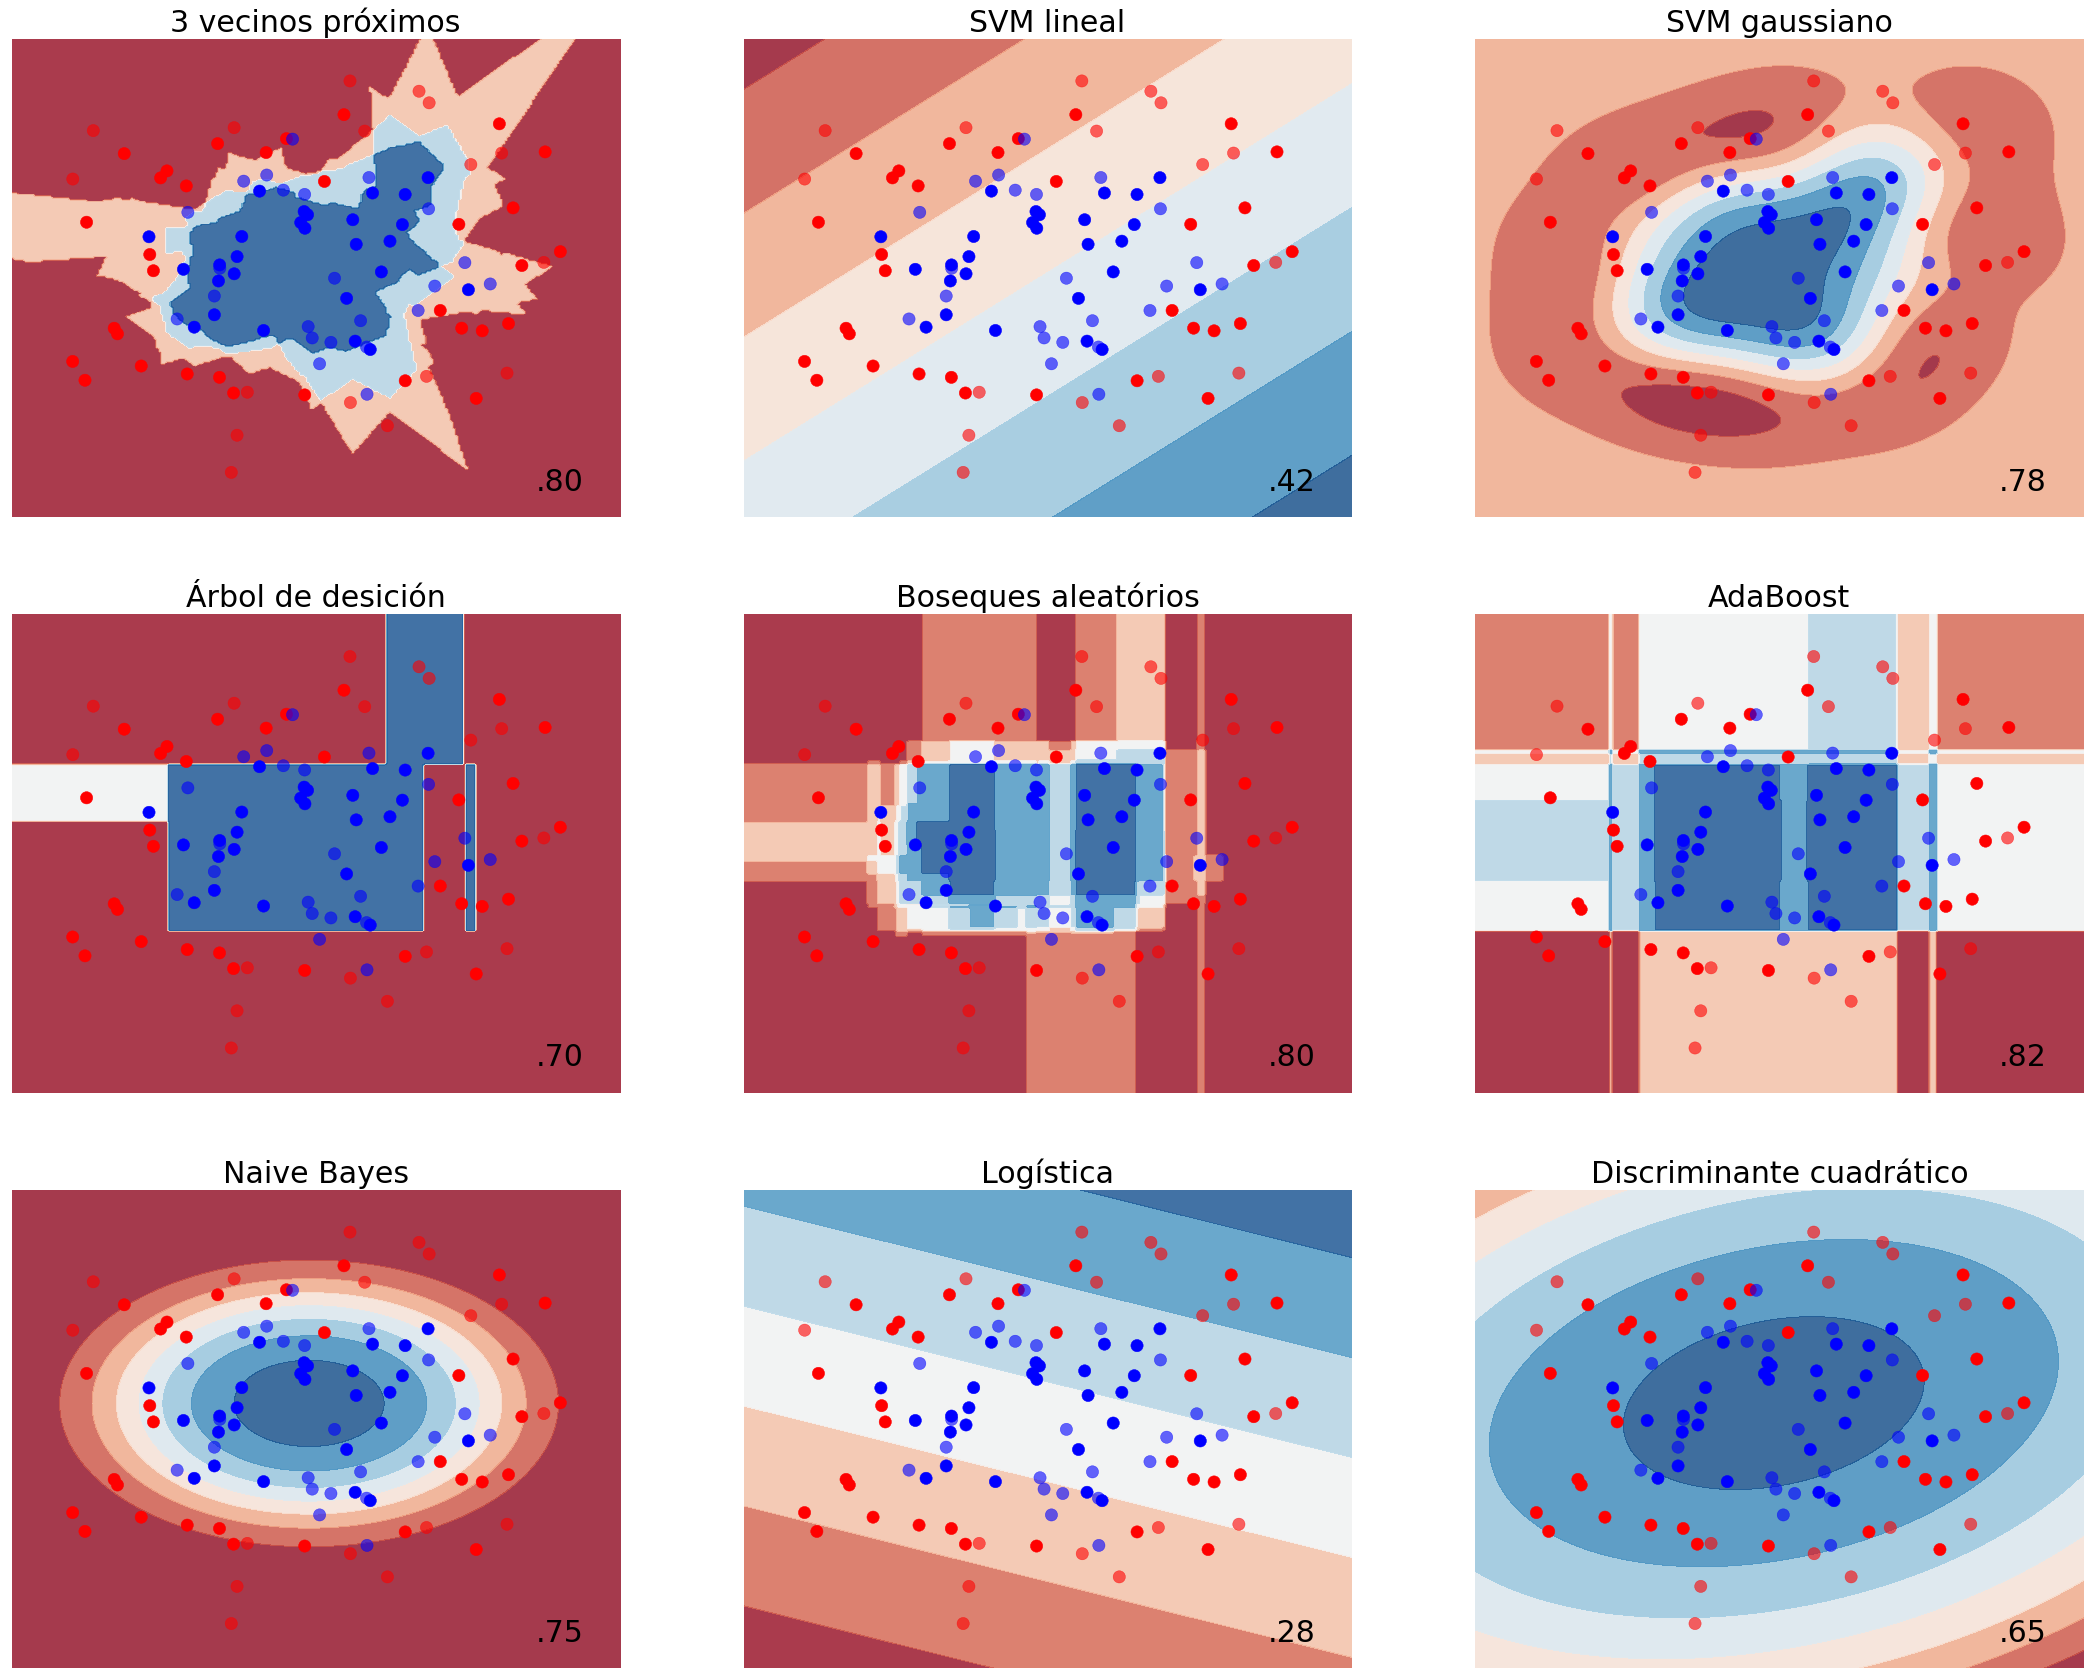





******************************

Base de datos 3
******************************



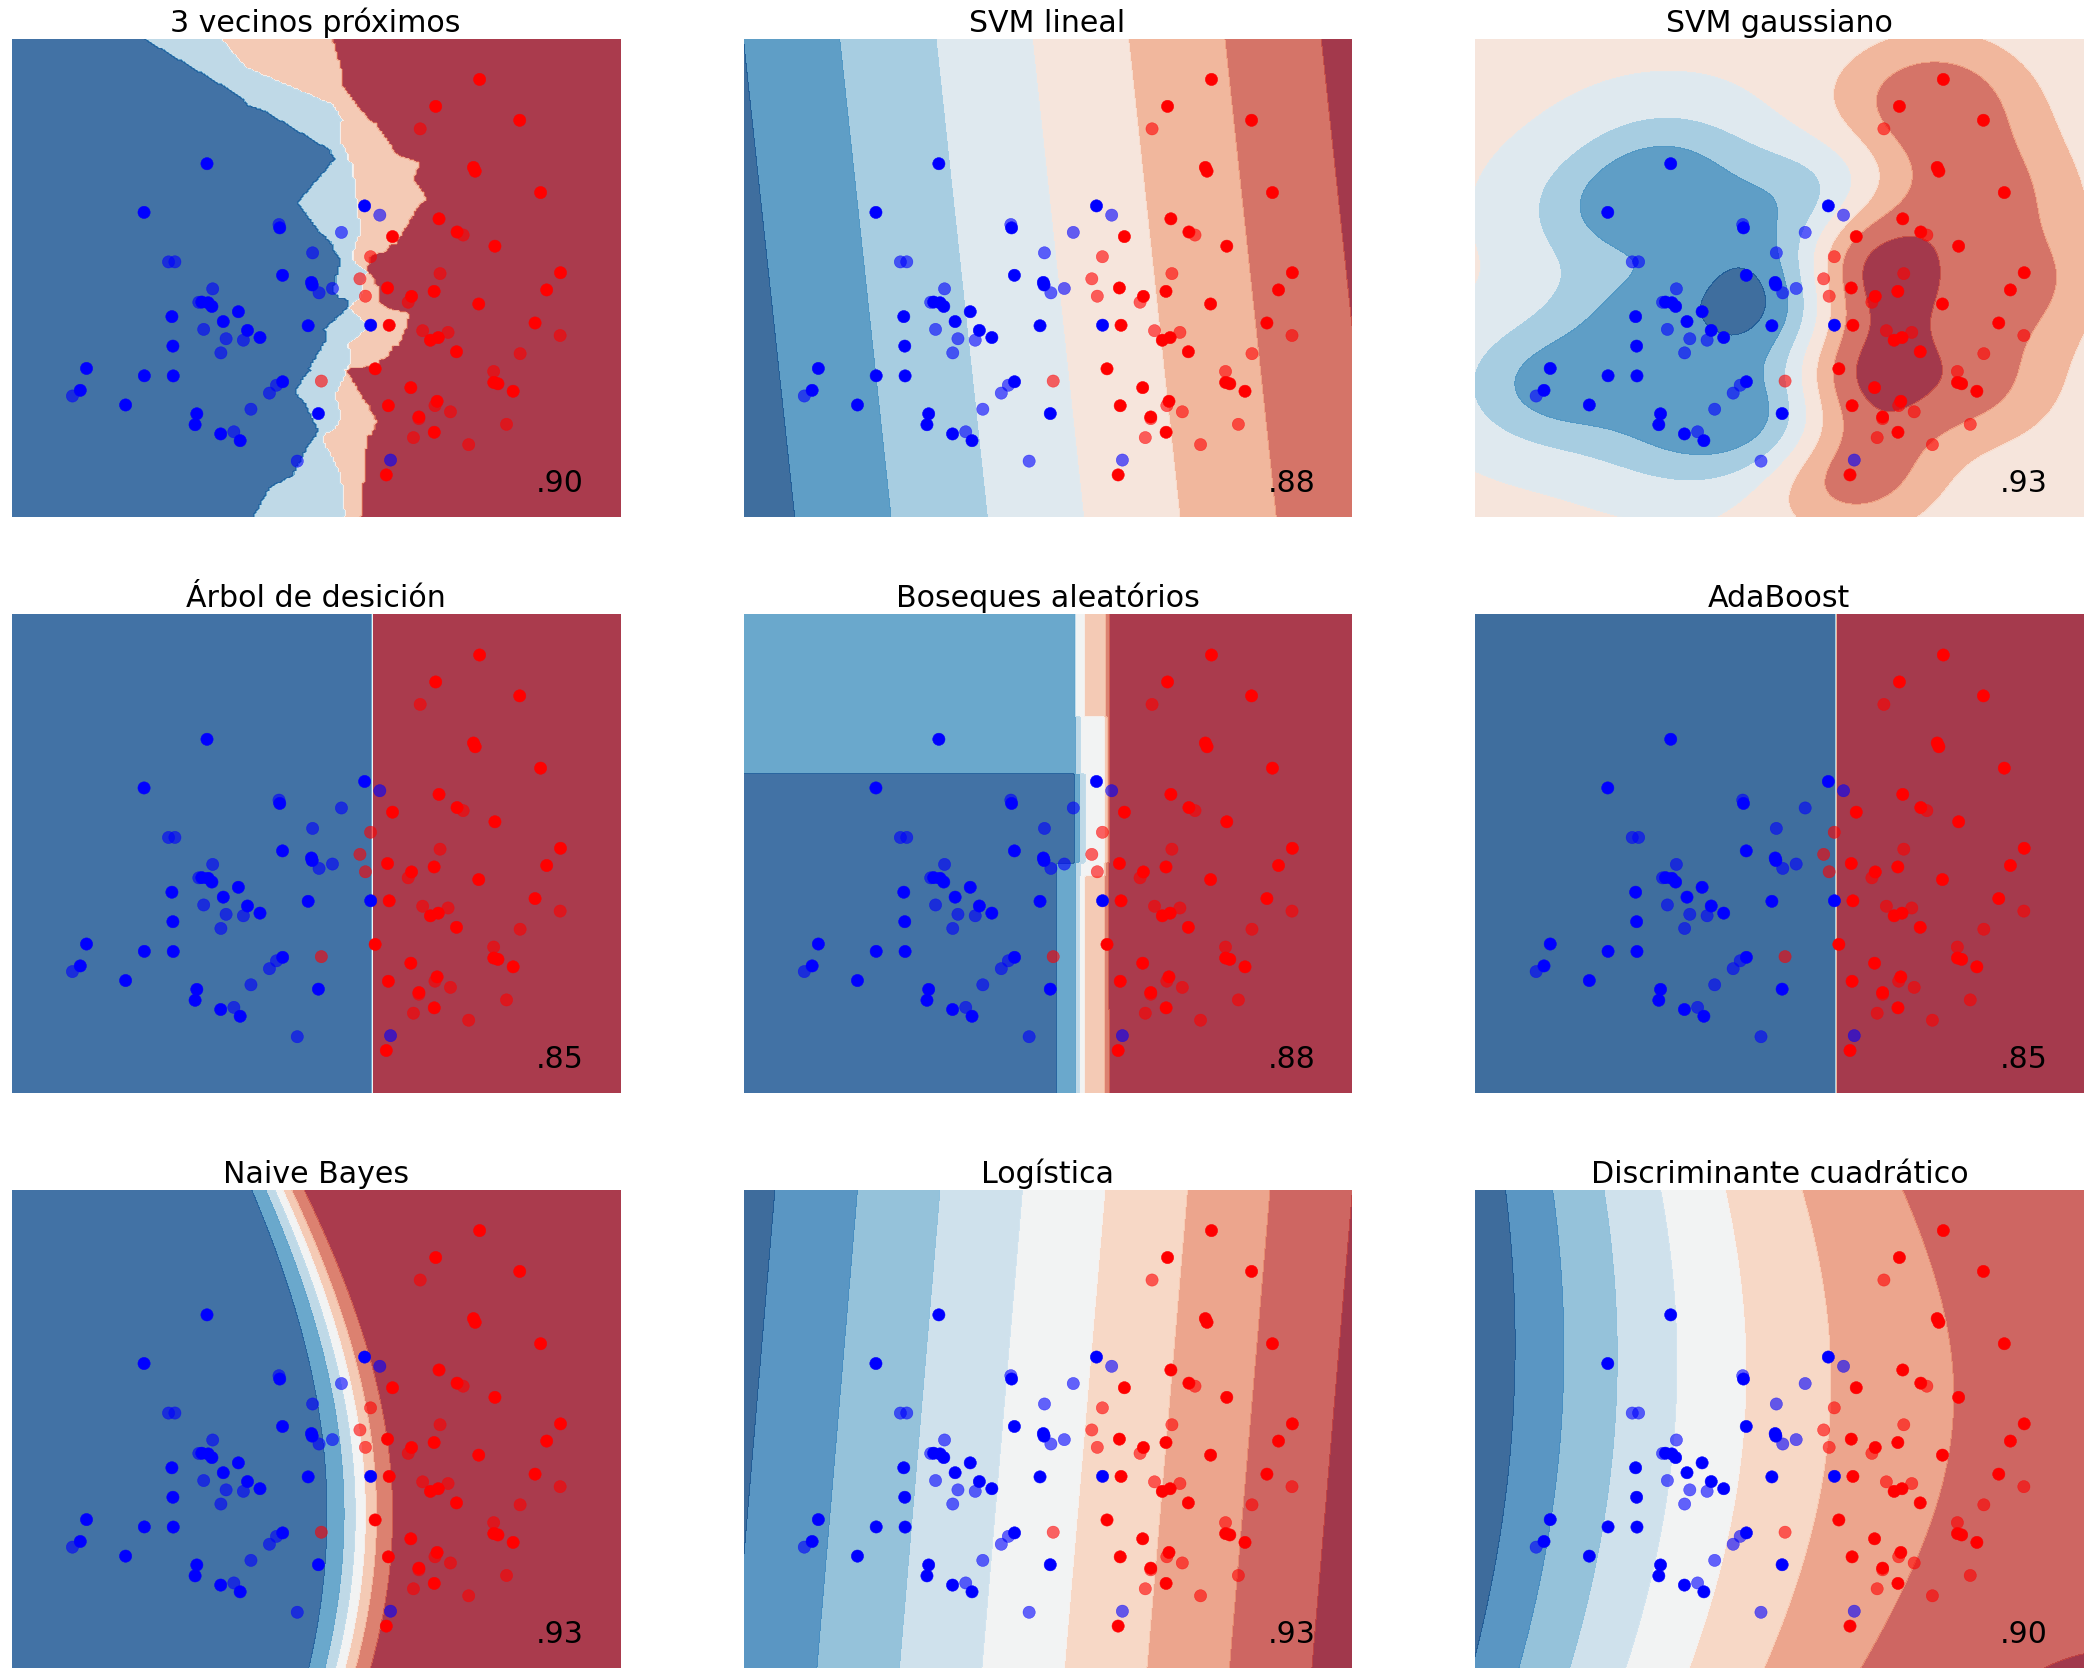

In [4]:
## Vamos a escoger una escala de colores de alto contraste
cm = plt.cm.RdBu
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (cual, ds) in enumerate(datasets):
    
    print('\n' * 3)
    print("*"*30 + "\n")
    print("Base de datos " + str(cual + 1))
    print("*"*30 + "\n")
    figure = plt.figure(figsize=(30, 30))


    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, (titulo, clf)) in enumerate(zip(titulos, clasificadores)):
        
        # Escoge el subplot
        ax = plt.subplot(3, 3, i + 1)
        
        # El entrenamiento!!!!
        clf.fit(X_train, y_train)
        
        # Encuentra el error de validación
        score = clf.score(X_test, y_test)

        # Clasifica cada punto en el meshgrid
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un color a cada punto
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Grafica los datos de entrenamiento y prueba
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_escala, s=150)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_escala, s=150, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(titulo, size=30)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()



#### Ejercicio 1.

Para cada una de las técnicas, describe en que casos crees que la técnica sería de las mejores técnics a utilizar como método de clasificación (puedes consultar bibbliografía o solo apoyarte en los resultados, pero tiene que ser congruente).

1. **3 vecinos próximos**: En este algoritmo la precisión de sus predicciones se basa en gran parte en la medida de la distancia, de forma que suele ser muy útil cuando se tiene un buen conocimiento de dominio del problema que se está tratando y no hay una cantidad muy grande de datos.

2. **SVM lineal**: Este algoritmo es muy útil cuando se tiene una gran cantidad de parámetros ya que es más probable que los datos se puedan separar linealmente en un espacio con una dimensión alta. También el SVM lineal se utiliza cuando se tiene un conjunto de datos separables linealmente, es por eso que con la 2da base de datos no predice bien.

3. **SVM gaussiano**: Cuando los datos no son linealmente separables conviene más usar este algoritmo, como se puede observar a diferencia del algoritmo anterior en la 2da base de datos tiene mejores resultados.

4. **Árbol de desición**: En este algoritmo la principal ventaja es su capacidad para utilizar diferentes subconjuntos de parámetros y reglas para decidir en distintas etapas de la clasificación. Pueden manejar atributos discretos y atributos numéricos usándolos en condiciones divididas que están representadas por símbolos.

5. **Boseques aleatórios**: Este algoritmo puede lidiar con valores faltantes y puede mantener una buena precisión cuando hay muchos datos, además que puede manejarlos con mayor dimensionalidad. En los ejemplos obtiene buenos resultados en general.

6. **AdaBoost**: AdaBoost se puede utilizar para mejorar el rendimiento de cualquier algoritmo de aprendizaje automático. Se usa mejor con modelos que logran una precisión justo por encima de la probabilidad aleatoria en un problema de clasificación.
 
7. **Naive Bayes**: Este algoritmo es muy sencillo de aplicar debido a que no es tan complejo como otros. Puede funcionar bien con pocos datos.

8. **Discriminante lineal**: Este algoritmo se suele usar cuando los datos son linealmente separebles y también que el resultado sea binario.

9. **Discriminante cuadrático**: A diferencia del anterior este algoritmo no requiere que los datos sean linealmente separables. Puede capturar límites no lineales entre sus parámetros, de manera que es menos restringido.